In [1]:
import time

# Record start time
start_time = time.time()

# Your program code here
# Example:

In [2]:
# Import Data Profile Excel file name 'ProcessParasProfileUTL'
import polars as pl

# Specify the path to your Excel file and the sheet names to import
excel_path = 'PPP.xlsx'
sheet_names = ['ProcessParasProfileUTL']

# Read each specified sheet into a dictionary of DataFrames
dfs2 = {}
for sheet in sheet_names:
    dfs2[sheet] = pl.read_excel(
        excel_path,
        sheet_name=sheet  # Specifies which sheet to read
    )

# Access the DataFrame using the sheet name as the key
df4 = dfs2['ProcessParasProfileUTL']

In [3]:
# Convert the column to string (Utf8)
df4 = df4.with_columns(
    pl.col("ParaKey").cast(pl.Utf8)  # Cast to string
)
df4

EquipOpn,Sno,ParaGroup,ParaName,Unit,ParaKey,Active,EquipModel,SpecRevision,ParaClass
str,i64,str,str,str,str,i64,str,str,str
"""WSW""",21,"""Parameter Description""","""CH1_SPD[x]""","""NA""","""4280""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",22,"""Parameter Description""","""CH2_SPD[x]""","""NA""","""4290""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",23,"""Parameter Description""","""Chipping size Z1""","""nm""","""1404""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",26,"""Parameter Description""","""Chipping size Z2""","""nm""","""1405""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",27,"""Parameter Description""","""CO2 Injector Resitivity""","""kOhmcm""","""3223""",1,"""DFD6560""","""UTL1IED""","""SVID"""
…,…,…,…,…,…,…,…,…,…
"""WSW""",73,"""Parameter Description""","""Spindle rev. Z1 (Set in recipe…","""nm""","""4204""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",73,"""Parameter Description""","""Atomizing nozzle clean air pre…","""nm""","""1785""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",74,"""Parameter Description""","""Spindle rev. Z2 (Set in recipe…","""nm""","""4205""",1,"""DFD6560""","""UTL1IED""","""ECID"""


In [4]:
import polars as pl
import os

# Set the path to your folder containing 'PPCDataUTL' Excel files
folder_path = 'myfolder'

# Initialize a list to collect DataFrames
dfs_list = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):  # Process only .xlsx files
        excel_path = os.path.join(folder_path, filename)
        
        try:
            # Read the Excel file (defaults to first sheet)
            df = pl.read_excel(excel_path)
            dfs_list.append(df)
            
        except Exception as e:
            print(f"Error reading file {filename}: {e}")
            continue

# Combine all DataFrames (handles empty case gracefully)
df3 = pl.concat(dfs_list) if dfs_list else pl.DataFrame()

# Drop columns and sort
if not df3.is_empty():
    df3 = (
        df3
        .drop(['EquipOpn', 'ULotID', 'EventID'])  # Remove columns
        .sort(by=['EquipID', 'CreateTime'])  # Sort
        # .with_row_count("index")  # Optional: Add index column if needed
    )

# print("Data has been read from all files and combined into df3")

In [5]:
import polars as pl

# Define the column names and their corresponding data types
col_ECID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','4280':'int64','4290':'int64','6603':'int64','6611':'int64',
            '6607':'int64','6615':'int64','4628':'int64','4629':'int64','6641':'int64','16009':'int64','16058':'int64',
            '6640':'int64','16008':'int64','16057':'int64','6636':'int64','16004':'int64','16053':'int64','6637':'int64',
            '16005':'int64','16054':'int64','6666':'int64','16034':'int64','16132':'int64','4204':'int64','4205':'int64'}

# Map Pandas-style data types to Polars data types
dtype_mapping = {
    'object': pl.Utf8,
    'datetime64[ns]': pl.Datetime,
    'float32': pl.Float32,
    'int64': pl.Int64
}

# Create a schema dictionary with Polars data types
polars_schema = {
    col: dtype_mapping[dtype] 
    for col, dtype in col_ECID.items()
}

# Initialize an empty DataFrame with the specified schema
ECID = pl.DataFrame({
    col: pl.Series(name=col, dtype=dt) 
    for col, dt in polars_schema.items()
})

#print(ECID)

In [6]:
import polars as pl

# Define the column names and their corresponding data types
col_SVID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','1404':'int64','1405':'int64','3223':'int64','1412':'int64',
            '1413':'int64','1400':'int64','1401':'int64','1763':'int64','1765':'int64','1352':'int64','1353':'int64',
            '1771':'int64','1775':'int64','1502':'int64','1503':'int64','1760':'int64','1759':'int64','1755':'int64',
            '1756':'int64','1500':'int64','1501':'int64','1785':'int64','1764':'int64','1766':'int64'}

# Map Pandas-style data types to Polars data types
dtype_mapping = {
    'object': pl.Utf8,
    'datetime64[ns]': pl.Datetime,
    'float32': pl.Float32,
    'int64': pl.Int64
}

# Create a schema dictionary with Polars data types
polars_schema = {
    col: dtype_mapping[dtype] 
    for col, dtype in col_SVID.items()
}

# Initialize an empty DataFrame with the specified schema
SVID = pl.DataFrame({
    col: pl.Series(name=col, dtype=dt) 
    for col, dt in polars_schema.items()
})

#print(SVID)

In [7]:
from tqdm import tqdm
import polars as pl

def get_parameter(s):
    pairs = s.split(',')
    parameter = {}
    for pair in pairs:
        key_str, value_str = pair.split(':')
        key = int(key_str)
        if value_str != 'System.Byte[]':
            value = int(value_str)
            parameter[key] = value
    return parameter

# Initialize lists to collect new rows for SVID and ECID
svid_rows = []
ecid_rows = []

# Iterate over each row in df3 with a progress bar
for row in tqdm(df3.iter_rows(named=True), desc="Processing rows"):
    # Extract the parameters string from the 'parameters' column (adjust column name if necessary)
    param_str = row['Parameter']
    # Parse the parameters string into a dictionary
    param_dict = get_parameter(param_str)
    # Add additional columns from the current row
    param_dict.update({
        'EquipID': row['EquipID'],
        'CreateTime': row['CreateTime'],
        'EventDesc': row['EventDesc']
    })
    # Convert all keys to strings
    param_dict = {str(k): v for k, v in param_dict.items()}
    
    # Check for SVID record (key '1404' with value > 0)
    svid_value = param_dict.get('1404', 0)
    if svid_value > 0:
        # Create a row with columns matching SVID's schema, filling missing keys with None
        svid_row = {col: param_dict.get(col, None) for col in SVID.columns}
        svid_rows.append(svid_row)
    
    # Check for ECID record (key '4280' with value > 0)
    ecid_value = param_dict.get('4280', 0)
    if ecid_value > 0:
        # Create a row with columns matching ECID's schema, filling missing keys with None
        ecid_row = {col: param_dict.get(col, None) for col in ECID.columns}
        ecid_rows.append(ecid_row)

# Append collected rows to SVID and ECID DataFrames
#if svid_rows:
    #SVID = pl.concat([SVID, pl.DataFrame(svid_rows)])
#if ecid_rows:
    #ECID = pl.concat([ECID, pl.DataFrame(ecid_rows)])

Processing rows: 2040406it [01:31, 22216.11it/s]


In [8]:
import pandas as pd
SVID = pd.DataFrame(svid_rows)
SVID['CreateTimeUnix'] = SVID['CreateTime'].astype('int64') // 10**9
SVID.sort_values(by=['EquipID', 'CreateTime'])
#SVID_polars = pl.from_pandas(SVID)
SVID = pl.from_pandas(SVID)

ECID = pd.DataFrame(ecid_rows)
ECID['CreateTimeUnix'] = ECID['CreateTime'].astype('int64') // 10**9
ECID.sort_values(by=['EquipID', 'CreateTime'])
#ECID_polars = pl.from_pandas(ECID)
ECID = pl.from_pandas(ECID)

df3 = df3.with_columns(
    pl.col("CreateTime").dt.epoch('s').alias("CreateTimeUnix")
)

In [9]:
# Memory release 
svid_rows = []
ecid_rows = []

In [10]:
SVID

EquipID,CreateTime,CreateTimeUnix,EventDesc,1404,1405,3223,1412,1413,1400,1401,1763,1765,1352,1353,1771,1775,1502,1503,1760,1759,1755,1756,1500,1501,1785,1764,1766
str,datetime[ns],i64,str,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""TSWD036""",2025-03-17 00:02:11.533,1742169731,"""Kerf Check Start""",4930,3944,null,34510,16762,0,-986,720,1060,140462,138176,0,0,720,1060,204,205,137,128,40000,50000,417,40000,49960
"""TSWD036""",2025-03-17 00:02:11.533,1742169731,"""Kerf Check Start""",4930,3944,null,34510,16762,0,-986,720,1060,140462,138176,0,0,720,1060,204,205,137,128,40000,50000,417,40000,49960
"""TSWD036""",2025-03-17 00:06:13.193,1742169973,"""Kerf Check End""",986,9860,null,33524,17748,-493,493,720,1080,140462,138176,0,0,720,1060,204,205,134,130,40000,49960,217,40000,50000
"""TSWD036""",2025-03-17 00:06:13.193,1742169973,"""Kerf Check End""",986,9860,null,33524,17748,-493,493,720,1080,140462,138176,0,0,720,1060,204,205,134,130,40000,49960,217,40000,50000
"""TSWD036""",2025-03-17 00:08:57.073,1742170137,"""Kerf Check Start""",986,9860,null,33524,17748,-493,493,740,1080,140462,138176,0,0,740,1060,135,205,136,205,40000,49960,216,40000,49960
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""",2025-03-20 23:58:19.580,1742515099,"""Kerf Check End""",1964,10802,314.0,36334,26514,0,0,1200,1160,186182,84582,900,950,1260,1220,207,205,130,134,49950,49950,525,49950,50000
"""TSWD299""",2025-03-20 23:59:15.343,1742515155,"""Kerf Check Start""",1964,10802,294.0,36334,26514,0,0,790,830,186182,211582,0,0,790,810,207,205,130,134,49950,50000,507,49950,49950
"""TSWD299""",2025-03-20 23:59:15.343,1742515155,"""Kerf Check Start""",1964,10802,294.0,36334,26514,0,0,790,830,186182,211582,0,0,790,810,207,205,130,134,49950,50000,507,49950,49950


In [11]:
ECID

EquipID,CreateTime,CreateTimeUnix,EventDesc,4280,4290,6603,6611,6607,6615,4628,4629,6641,16009,16058,6640,16008,16057,6636,16004,16053,6637,16005,16054,6666,16034,16132,4204,4205
str,datetime[ns],i64,str,i64,i64,f64,f64,f64,f64,i64,i64,f64,str,str,f64,str,str,f64,str,str,f64,str,str,f64,str,str,i64,i64
"""TSWD036""",2025-03-17 00:02:11.510,1742169731,"""Kerf Check Start""",19050000,19050000,null,null,null,null,3810,3810,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,40000,50000
"""TSWD036""",2025-03-17 00:02:11.510,1742169731,"""Kerf Check Start""",19050000,19050000,null,null,null,null,3810,3810,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,40000,50000
"""TSWD036""",2025-03-17 00:02:26.060,1742169746,"""Kerf Check End""",19050000,19050000,null,null,null,null,3810,3810,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,40000,50000
"""TSWD036""",2025-03-17 00:02:26.060,1742169746,"""Kerf Check End""",19050000,19050000,null,null,null,null,3810,3810,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,40000,50000
"""TSWD036""",2025-03-17 00:03:07.220,1742169787,"""Kerf Check Start""",19050000,19050000,null,null,null,null,3810,3810,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,40000,50000
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""",2025-03-20 23:58:19.393,1742515099,"""Kerf Check End""",50800000,50800000,1000.0,800.0,1000.0,800.0,5080,5080,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000
"""TSWD299""",2025-03-20 23:59:15.157,1742515155,"""Kerf Check Start""",50800000,50800000,1000.0,800.0,1000.0,800.0,5080,5080,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000
"""TSWD299""",2025-03-20 23:59:15.157,1742515155,"""Kerf Check Start""",50800000,50800000,1000.0,800.0,1000.0,800.0,5080,5080,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000


In [12]:
df3

EquipID,Recipe,Parameter,CreateTime,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,BladeOD_Z2,BladeThickness_Z2,FlangeODType_Z2,CreateTimeUnix
str,str,str,datetime[ms],str,str,f64,f64,str,str,f64,f64,str,i64
"""TSWD036""","""STM0533P_J_2""","""4280:19050000,4290:19050000,66…",2025-03-17 00:02:11.510,"""Kerf Check Start""","""SW00000206""",2.1874,0.001,"""Hub""","""SW00000152""",2.1874,0.00079,"""Hub""",1742169731
"""TSWD036""","""STM0533P_J_2""","""4280:19050000,4290:19050000,66…",2025-03-17 00:02:11.510,"""Kerf Check Start""","""SW00000206""",2.1874,0.001,"""Hub""","""SW00000152""",2.1874,0.00079,"""Hub""",1742169731
"""TSWD036""","""STM0533P_J_2""","""1404:4930,1405:3944,3223:Syste…",2025-03-17 00:02:11.533,"""Kerf Check Start""","""SW00000206""",2.1874,0.001,"""Hub""","""SW00000152""",2.1874,0.00079,"""Hub""",1742169731
"""TSWD036""","""STM0533P_J_2""","""1404:4930,1405:3944,3223:Syste…",2025-03-17 00:02:11.533,"""Kerf Check Start""","""SW00000206""",2.1874,0.001,"""Hub""","""SW00000152""",2.1874,0.00079,"""Hub""",1742169731
"""TSWD036""","""STM0533P_J_2""","""4280:19050000,4290:19050000,66…",2025-03-17 00:02:26.060,"""Kerf Check End""","""SW00000206""",2.1874,0.001,"""Hub""","""SW00000152""",2.1874,0.00079,"""Hub""",1742169746
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""","""ISL0593P_D_3""","""1404:1964,1405:10802,3223:294,…",2025-03-20 23:59:15.343,"""Kerf Check Start""","""SW00000156""",2.1874,0.0014,"""Hub""","""SW00000159""",2.1874,0.035,"""Hub""",1742515155
"""TSWD299""","""ISL0593P_D_3""","""4280:50800000,4290:50800000,66…",2025-03-20 23:59:30.777,"""Kerf Check End""","""SW00000156""",2.1874,0.0014,"""Hub""","""SW00000159""",2.1874,0.035,"""Hub""",1742515170
"""TSWD299""","""ISL0593P_D_3""","""4280:50800000,4290:50800000,66…",2025-03-20 23:59:30.777,"""Kerf Check End""","""SW00000156""",2.1874,0.0014,"""Hub""","""SW00000159""",2.1874,0.035,"""Hub""",1742515170


In [13]:
import duckdb
# Query directly on the DataFrame (no need to load into a database)
result = duckdb.sql("""
    SELECT df3.EquipID, Recipe, df3.CreateTime, df3.CreateTimeUnix, df3.EventDesc,
    SAW_ProductionStock_Z1, BladeOD_Z1, BladeThickness_Z1, FlangeODType_Z1,
    SAW_ProductionStock_Z2, BladeOD_Z2, BladeThickness_Z2, FlangeODType_Z2,
    ECID."4280" AS ECID_4280, 
    ECID."4290" AS ECID_4290, 
    ECID."6603" AS ECID_6603, 
    ECID."6611" AS ECID_6611,
    ECID."6607" AS ECID_6607, 
    ECID."6615" AS ECID_6615, 
    ECID."4628" AS ECID_4628,
    ECID."4629" AS ECID_4629,
    ECID."6641" AS ECID_6641,
    ECID."16009" AS ECID_16009,
    ECID."16058" AS ECID_16058,
    ECID."6640" AS ECID_6640,
    ECID."16008" AS ECID_16008,
    ECID."16057" AS ECID_16057,
    ECID."6636" AS ECID_6636,
    ECID."16004" AS ECID_16004,
    ECID."16053" AS ECID_16053,
    ECID."6637" AS ECID_6637,
    ECID."16005" AS ECID_16005,
    ECID."16054" AS ECID_16054,
    ECID."6666" AS ECID_6666,
    ECID."16034" AS ECID_16034,
    ECID."16132" AS ECID_16132,
    ECID."4204" AS ECID_4204,
    ECID."4205" AS ECID_4205,
    SVID."1404" AS SVID_1404,
    SVID."1405" AS SVID_1405,
    SVID."3223" AS SVID_3223,
    SVID."1412" AS SVID_1412,
    SVID."1413" AS SVID_1413,
    SVID."1400" AS SVID_1400,
    SVID."1401" AS SVID_1401,
    SVID."1763" AS SVID_1763,
    SVID."1765" AS SVID_1765,
    SVID."1352" AS SVID_1352,
    SVID."1353" AS SVID_1353,
    SVID."1771" AS SVID_1771,
    SVID."1775" AS SVID_1775,
    SVID."1502" AS SVID_1502,
    SVID."1503" AS SVID_1503,
    SVID."1760" AS SVID_1760,
    SVID."1759" AS SVID_1759,
    SVID."1755" AS SVID_1755,
    SVID."1756" AS SVID_1756,
    SVID."1500" AS SVID_1500,
    SVID."1501" AS SVID_1501,
    SVID."1785" AS SVID_1785,
    SVID."1764" AS SVID_1764,
    SVID."1766" AS SVID_1766
    FROM df3, SVID, ECID
    WHERE df3.EquipID = SVID.EquipID AND df3.EquipID = ECID.EquipID 
    AND df3.CreateTimeUnix = SVID.CreateTimeUnix AND df3.CreateTimeUnix = ECID.CreateTimeUnix AND df3.Parameter LIKE '4280%'
    ORDER BY df3.EquipID, df3.CreateTime ASC
""").to_df()
result

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,EquipID,Recipe,CreateTime,CreateTimeUnix,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,...,SVID_1503,SVID_1760,SVID_1759,SVID_1755,SVID_1756,SVID_1500,SVID_1501,SVID_1785,SVID_1764,SVID_1766
0,TSWD036,STM0533P_J_2,2025-03-17 00:02:11.510,1742169731,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060,204,205,137,128,40000,50000,417,40000,49960
1,TSWD036,STM0533P_J_2,2025-03-17 00:02:11.510,1742169731,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060,204,205,137,128,40000,50000,417,40000,49960
2,TSWD036,STM0533P_J_2,2025-03-17 00:02:11.510,1742169731,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060,204,205,137,128,40000,50000,417,40000,49960
3,TSWD036,STM0533P_J_2,2025-03-17 00:02:11.510,1742169731,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060,204,205,137,128,40000,50000,417,40000,49960
4,TSWD036,STM0533P_J_2,2025-03-17 00:02:11.510,1742169731,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060,204,205,137,128,40000,50000,417,40000,49960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683507,TSWD299,ISL0593P_D_3,2025-03-20 23:59:30.777,1742515170,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1160,207,205,130,133,50000,50000,526,49950,49950
3683508,TSWD299,ISL0593P_D_3,2025-03-20 23:59:30.777,1742515170,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1160,207,205,130,133,50000,50000,526,49950,49950
3683509,TSWD299,ISL0593P_D_3,2025-03-20 23:59:30.777,1742515170,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1160,207,205,130,133,50000,50000,526,49950,49950
3683510,TSWD299,ISL0593P_D_3,2025-03-20 23:59:30.777,1742515170,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1160,207,205,130,133,50000,50000,526,49950,49950


In [14]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683512 entries, 0 to 3683511
Data columns (total 62 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   EquipID                 object        
 1   Recipe                  object        
 2   CreateTime              datetime64[ms]
 3   CreateTimeUnix          int64         
 4   EventDesc               object        
 5   SAW_ProductionStock_Z1  object        
 6   BladeOD_Z1              float64       
 7   BladeThickness_Z1       float64       
 8   FlangeODType_Z1         object        
 9   SAW_ProductionStock_Z2  object        
 10  BladeOD_Z2              float64       
 11  BladeThickness_Z2       float64       
 12  FlangeODType_Z2         object        
 13  ECID_4280               int64         
 14  ECID_4290               int64         
 15  ECID_6603               float64       
 16  ECID_6611               float64       
 17  ECID_6607               float64       
 18  EC

In [15]:
# Memory release 
df3 = []
SVID = []
ECID = []

In [16]:
# Anomaly Detection with Isolation Forest Code
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load your dataframe here
# result = pd.read_csv(...)

# Initial cleaning
df = result.dropna(axis=1, how='all')          # Drop completely empty columns
df = df.dropna(axis=0, how='any')              # Drop rows with any missing values
df = df.drop(['CreateTime', 'CreateTimeUnix'], axis=1)  # Remove time columns

# Free Memory
result = []

# Preserve original categorical values before encoding
original_cat_columns = df.select_dtypes(include='object').copy()
encoded_df = df.copy()

# Label encode categorical columns
cat_cols = original_cat_columns.columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

# Train Isolation Forest and get scores
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)
model.fit(encoded_df)

# Get anomaly scores and normalize them to 0-1 range
scores = model.decision_function(encoded_df)
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores.reshape(-1, 1))

# Create results dataframe with original values and scores
encoded_df['AnomalyScore'] = scores  # Original scores (-0.5 to 0.5)
encoded_df['AnomalyScore_normalized'] = normalized_scores  # 0-1 scaled

results_df = pd.concat([
    encoded_df[['AnomalyScore', 'AnomalyScore_normalized']],
    original_cat_columns,
    df.select_dtypes(exclude='object')
], axis=1)

# Sort by anomaly score for better inspection
results_df = results_df.sort_values('AnomalyScore_normalized', ascending=False)

# Extract anomalies with original values
anomalies_df = results_df[results_df['AnomalyScore_normalized'] > 0.5]  # Adjust threshold as needed
print(f"Found {len(anomalies_df)} anomalies from {len(df)} total records")
print("\nTop 5 anomalies:")
print(anomalies_df.head())

# Verification metrics
print("\nScore Statistics:")
print(f"Mean score: {results_df.AnomalyScore_normalized.mean():.2f}")
print(f"Max score: {results_df.AnomalyScore_normalized.max():.2f}")
print(f"Min score: {results_df.AnomalyScore_normalized.min():.2f}")

Found 2932976 anomalies from 3099760 total records

Top 5 anomalies:
         AnomalyScore  AnomalyScore_normalized  EquipID      Recipe  \
1586897      0.143615                      1.0  TSWD184  ONS2240P_B   
1586898      0.143615                      1.0  TSWD184  ONS2240P_B   
1586899      0.143615                      1.0  TSWD184  ONS2240P_B   
1586900      0.143615                      1.0  TSWD184  ONS2240P_B   
1586901      0.143615                      1.0  TSWD184  ONS2240P_B   

                EventDesc SAW_ProductionStock_Z1 FlangeODType_Z1  \
1586897  Kerf Check Start             SW00000058             Hub   
1586898  Kerf Check Start             SW00000058             Hub   
1586899  Kerf Check Start             SW00000058             Hub   
1586900  Kerf Check Start             SW00000058             Hub   
1586901  Kerf Check Start             SW00000058             Hub   

        SAW_ProductionStock_Z2 FlangeODType_Z2  BladeOD_Z1  ...  SVID_1503  \
1586897          

In [17]:
# Free Memory
results_df = []

In [18]:
anomalies_df.info()
anomalies_df.to_csv('anomaly_output.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2932976 entries, 1586897 to 236978
Data columns (total 52 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   AnomalyScore             float64
 1   AnomalyScore_normalized  float64
 2   EquipID                  object 
 3   Recipe                   object 
 4   EventDesc                object 
 5   SAW_ProductionStock_Z1   object 
 6   FlangeODType_Z1          object 
 7   SAW_ProductionStock_Z2   object 
 8   FlangeODType_Z2          object 
 9   BladeOD_Z1               float64
 10  BladeThickness_Z1        float64
 11  BladeOD_Z2               float64
 12  BladeThickness_Z2        float64
 13  ECID_4280                int64  
 14  ECID_4290                int64  
 15  ECID_6603                float64
 16  ECID_6611                float64
 17  ECID_6607                float64
 18  ECID_6615                float64
 19  ECID_4628                int64  
 20  ECID_4629                int64  
 21  ECID_664

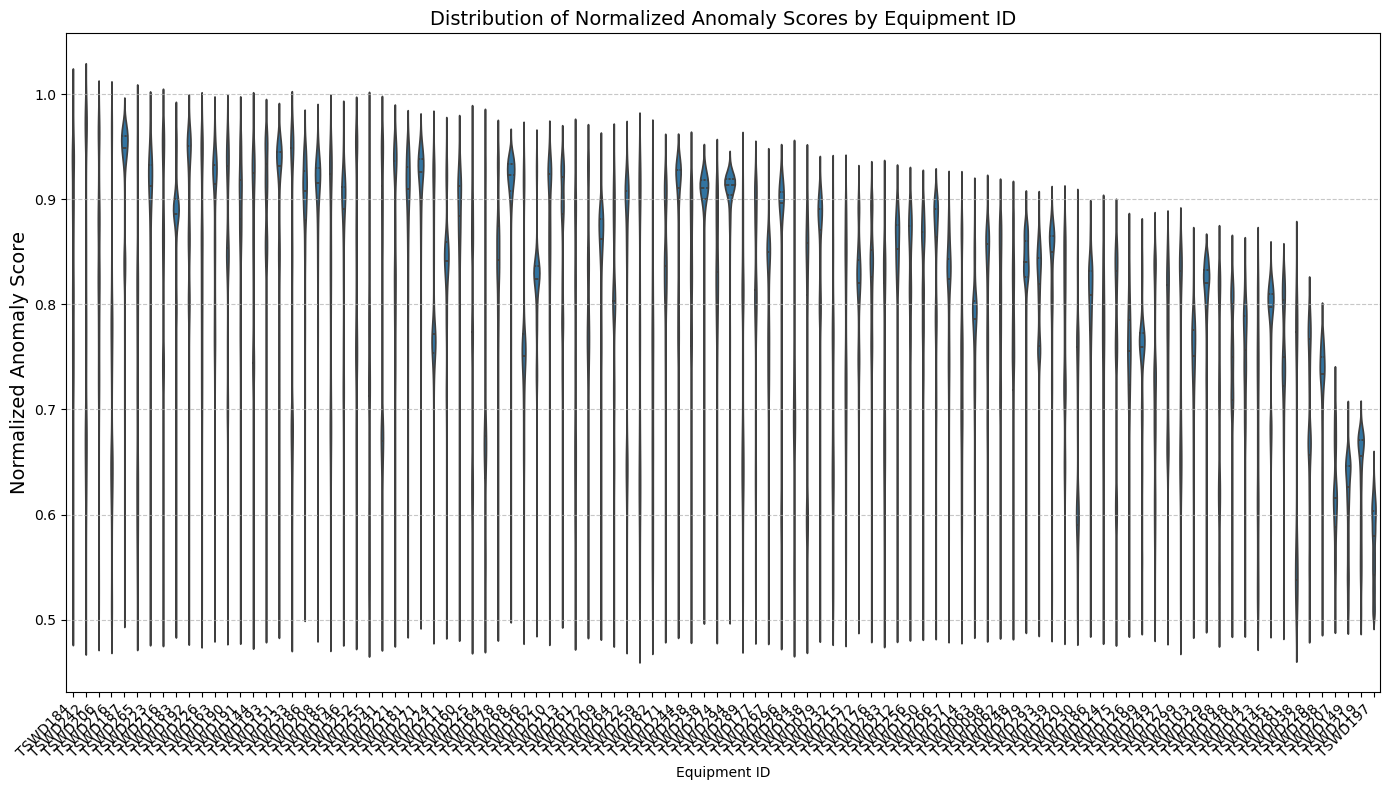

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='EquipID',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Equipment ID', fontsize=14)
plt.xlabel('Equipment ID', fontsize=10)
plt.ylabel('Normalized Anomaly Score', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

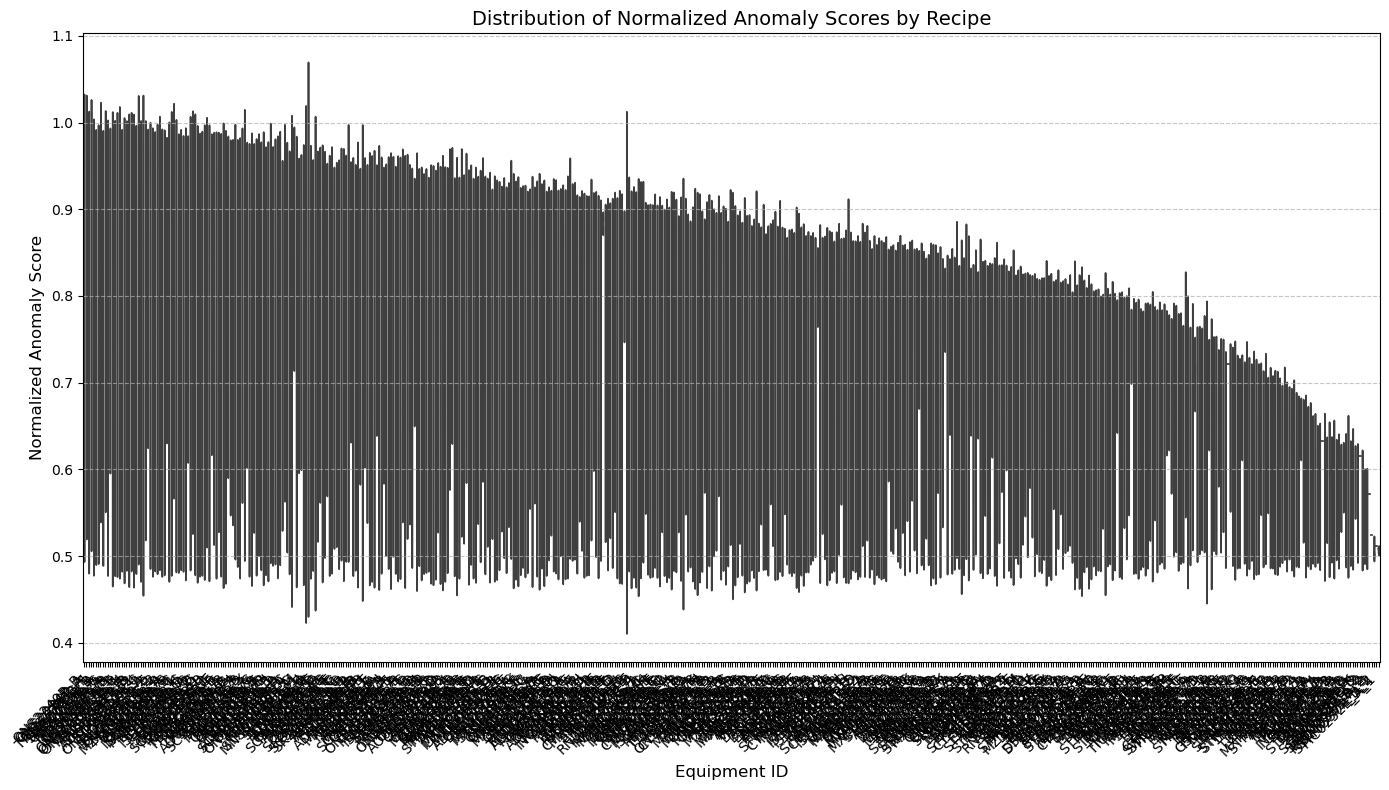

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='Recipe',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Recipe', fontsize=14)
plt.xlabel('Equipment ID', fontsize=12)
plt.ylabel('Normalized Anomaly Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [21]:
# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.6f} seconds")

Processing time: 320.239781 seconds
